In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_adc_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_adc_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_adc_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_adc_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_adc_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_adc_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

Number train images:  192
Number val images:  11
Number test images:  12


In [4]:
model_name = 'vgg_unet_padded'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.98175173 0.01824827]
[ 1.         53.79972696]
[0.01841682 4.00368521]


Model output shape (None, 50176, 2)
Epoch 0
Epoch 1/1
24/24 [==============================] - 843s 35s/step - loss: 0.1082 - acc: 0.0761 - dice: 0.0339 - iou: 0.0173 - val_loss: 0.0341 - val_acc: 0.0086 - val_dice: 0.0169 - val_iou: 0.0085
Epoch 1
Epoch 1/1
24/24 [==============================] - 833s 35s/step - loss: 0.0447 - acc: 0.0185 - dice: 0.0358 - iou: 0.0183 - val_loss: 0.0346 - val_acc: 0.0100 - val_dice: 0.0169 - val_iou: 0.0085
Epoch 2
Epoch 1/1
24/24 [==============================] - 833s 35s/step - loss: 0.0456 - acc: 0.0261 - dice: 0.0361 - iou: 0.0184 - val_loss: 0.0366 - val_acc: 0.0101 - val_dice: 0.0169 - val_iou: 0.0085
Epoch 3
Epoch 1/1
24/24 [==============================] - 827s 34s/step - loss: 0.0479 - acc: 0.0633 - dice: 0.0340 - iou: 0.0174 - val_loss: 0.0347 - val_acc: 0.0097 - val_dice: 0.0169 - val_iou: 0.0085
Epoch 4
Epoch 1/1
24/24 [==============================] - 828s 35s/step - loss: 0.0436 - acc: 0.0208 - dice: 0.0359 - iou: 0.0183 - val_loss: 0

Epoch 40
Epoch 1/1
24/24 [==============================] - 827s 34s/step - loss: 0.0047 - acc: 0.9615 - dice: 0.4988 - iou: 0.3399 - val_loss: 0.1025 - val_acc: 0.9070 - val_dice: 0.1139 - val_iou: 0.0604
Epoch 41
Epoch 1/1
24/24 [==============================] - 829s 35s/step - loss: 0.0056 - acc: 0.9447 - dice: 0.4604 - iou: 0.3116 - val_loss: 0.2906 - val_acc: 0.9688 - val_dice: 0.1865 - val_iou: 0.1028
Epoch 42
Epoch 1/1
24/24 [==============================] - 834s 35s/step - loss: 0.0041 - acc: 0.9622 - dice: 0.5091 - iou: 0.3499 - val_loss: 0.2802 - val_acc: 0.9661 - val_dice: 0.1800 - val_iou: 0.0989
Epoch 43
Epoch 1/1
24/24 [==============================] - 827s 34s/step - loss: 0.0047 - acc: 0.9610 - dice: 0.5108 - iou: 0.3520 - val_loss: 0.2951 - val_acc: 0.9670 - val_dice: 0.1793 - val_iou: 0.0985
Epoch 44
Epoch 1/1
24/24 [==============================] - 827s 34s/step - loss: 0.0045 - acc: 0.9622 - dice: 0.5304 - iou: 0.3700 - val_loss: 0.2910 - val_acc: 0.9678 - val_d

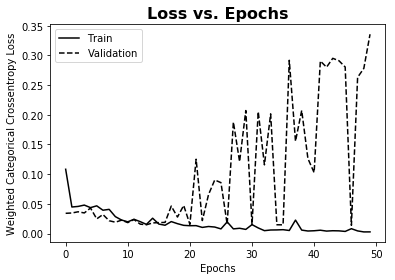

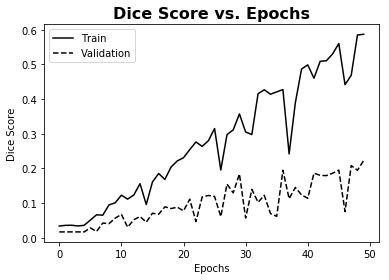

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

Total training time:  41574.079095264


In [ ]:
epochs = 50

In [8]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   9457992
           1       0.58      0.99      0.73    175800

   micro avg       0.99      0.99      0.99   9633792
   macro avg       0.79      0.99      0.86   9633792
weighted avg       0.99      0.99      0.99   9633792

F1/dice (binary):  0.7346971462772628
Jaccard/IOU:  0.5806492446576392


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [10]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    547242
           1       0.16      0.36      0.22      4694

   micro avg       0.98      0.98      0.98    551936
   macro avg       0.58      0.67      0.61    551936
weighted avg       0.99      0.98      0.98    551936

F1/dice (binary):  0.22288517634579685
Jaccard/IOU:  0.12541968216071028


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [12]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    585528
           1       0.51      0.68      0.58     16584

   micro avg       0.97      0.97      0.97    602112
   macro avg       0.75      0.83      0.78    602112
weighted avg       0.98      0.97      0.98    602112

F1/dice (binary):  0.5833633788308009
Jaccard/IOU:  0.41179464805119254


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)